In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/historic.csv'
df = pd.read_csv(file_path)


In [2]:
df.info

<bound method DataFrame.info of       item_no    category       main_promotion   color  stars  \
0      739157       Tunic              Catalog   Green    3.1   
1      591846      Hoodie   Category_Highlight     Red    1.5   
2      337574  Sweatshirt              Catalog     Red    4.4   
3      401933  Polo-Shirt   Category_Highlight    Blue    3.1   
4      812151      Hoodie   Category_Highlight   Green    4.1   
...       ...         ...                  ...     ...    ...   
7995   280947     T-Shirt              Catalog    Blue    3.9   
7996   874952  Sweatshirt     Frontpage_Header   Green    3.5   
7997   891640     T-Shirt   Category_Highlight  Yellow    4.0   
7998   786448      Blouse   Category_Highlight    Blue    2.6   
7999   847223  Sweatshirt  Display_Ad_Campaign    Blue    3.9   

     success_indicator  
0                 flop  
1                 flop  
2                  top  
3                 flop  
4                  top  
...                ...  
7995        

In [3]:
df.head(10)

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top
5,200284,Hoodie,Display_Ad_Campaign,Yellow,3.9,flop
6,974264,Sweatshirt,Catalog,Red,1.4,flop
7,389059,Sweatshirt,Category_Highlight,Red,1.8,top
8,413025,T-Shirt,Catalog,Black,3.2,top
9,615692,Hoodie,Category_Highlight,White,5.0,top


In [4]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB
None
             item_no        stars
count    8000.000000  8000.000000
mean   546474.338375     3.473075
std    256513.463874     0.978810
min    100171.000000     0.300000
25%    325001.500000     2.800000
50%    547081.000000     3.500000
75%    764312.250000     4.200000
max    989740.000000     6.100000


In [5]:
# Check for missing values
print(df.isnull().sum())


item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64


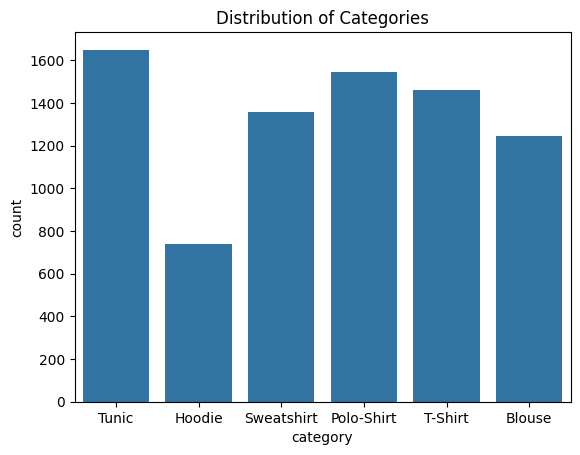

In [7]:
sns.countplot(x='category', data=df)
plt.title('Distribution of Categories')
plt.show()

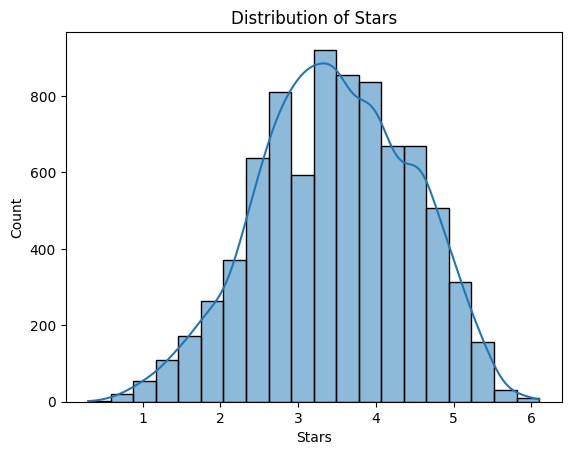

In [8]:
# Explore numerical variables
sns.histplot(df['stars'], bins=20, kde=True)
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.show()

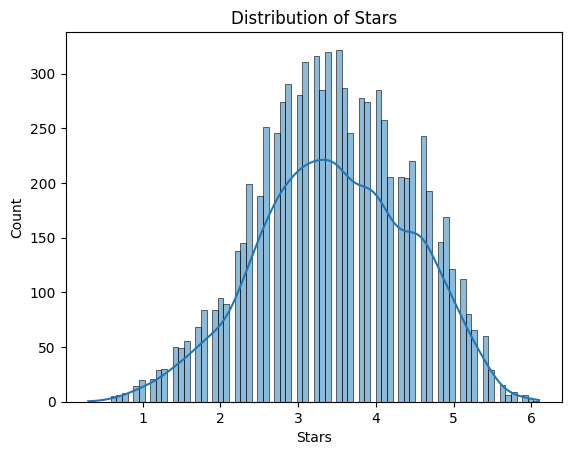

In [11]:
# Explore numerical variables
sns.histplot(df['stars'], bins=80, kde=True)
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.show()


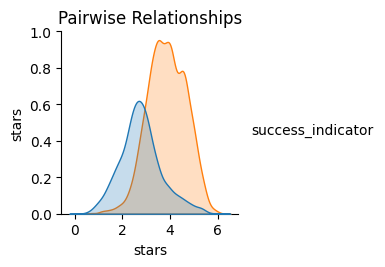

In [12]:
# Pairwise relationships
sns.pairplot(df[['stars', 'success_indicator']], hue='success_indicator')
plt.title('Pairwise Relationships')
plt.show()


<ipython-input-13-24c6cae51aba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


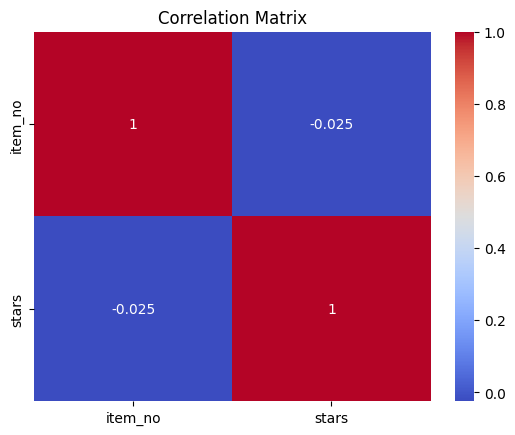

In [13]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


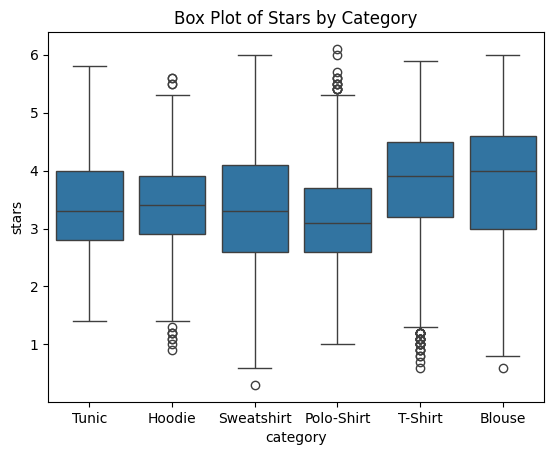

In [14]:
# Box plots
sns.boxplot(x='category', y='stars', data=df)
plt.title('Box Plot of Stars by Category')
plt.show()


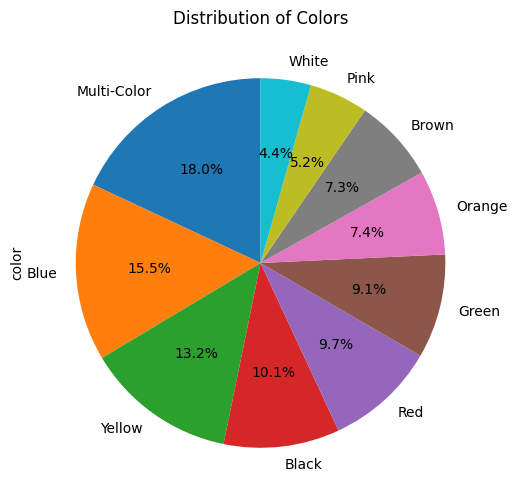

In [15]:
# Example for color distribution
plt.figure(figsize=(8, 6))
df['color'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Colors')
plt.show()


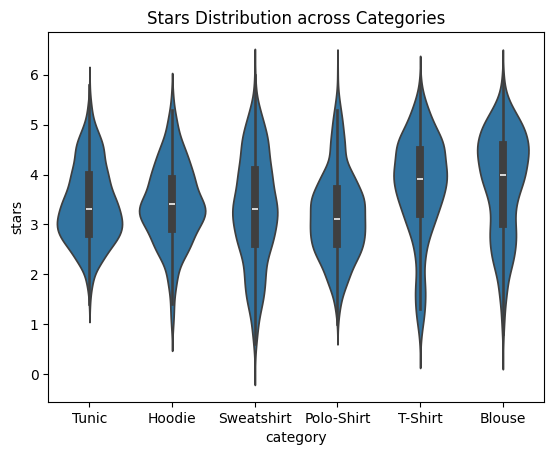

In [16]:
# Example for stars distribution across categories
sns.violinplot(x='category', y='stars', data=df)
plt.title('Stars Distribution across Categories')
plt.show()


In [17]:
#############

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [19]:
features = df[['item_no', 'category', 'main_promotion', 'color', 'stars']]
target = df['success_indicator']

In [21]:
# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# Print results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.64
Confusion Matrix:
[[   0  571]
 [   0 1029]]
Classification Report:
              precision    recall  f1-score   support

        flop       0.00      0.00      0.00       571
         top       0.64      1.00      0.78      1029

    accuracy                           0.64      1600
   macro avg       0.32      0.50      0.39      1600
weighted avg       0.41      0.64      0.50      1600



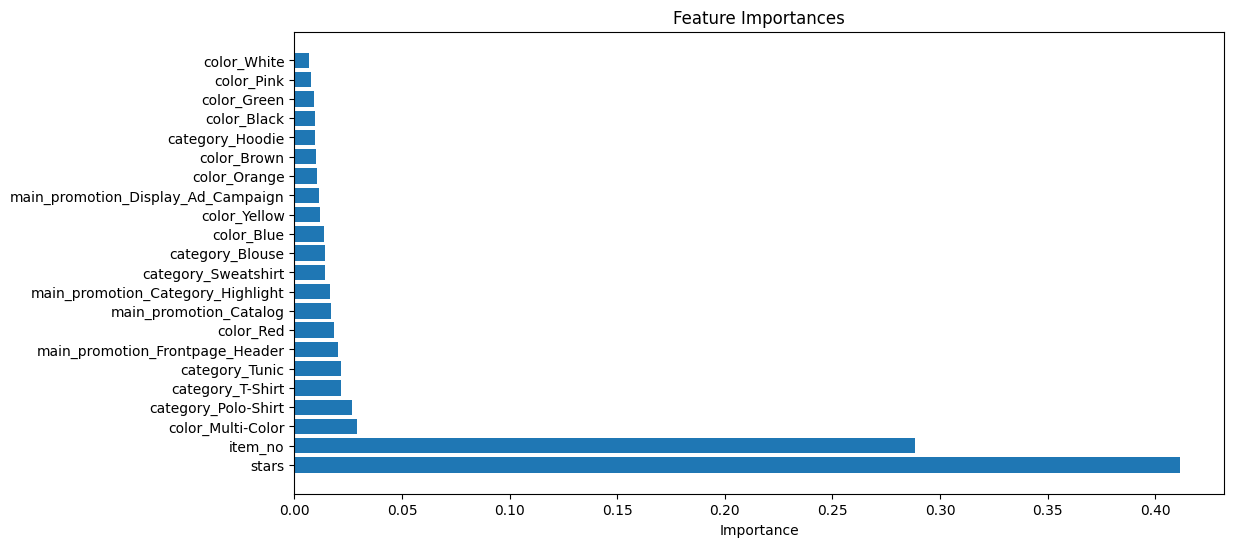

In [24]:
# Assuming 'success_indicator' is the target variable, and other columns are features
features = df[['item_no', 'category', 'main_promotion', 'color', 'stars']]
target = df['success_indicator']

# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = classifier.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

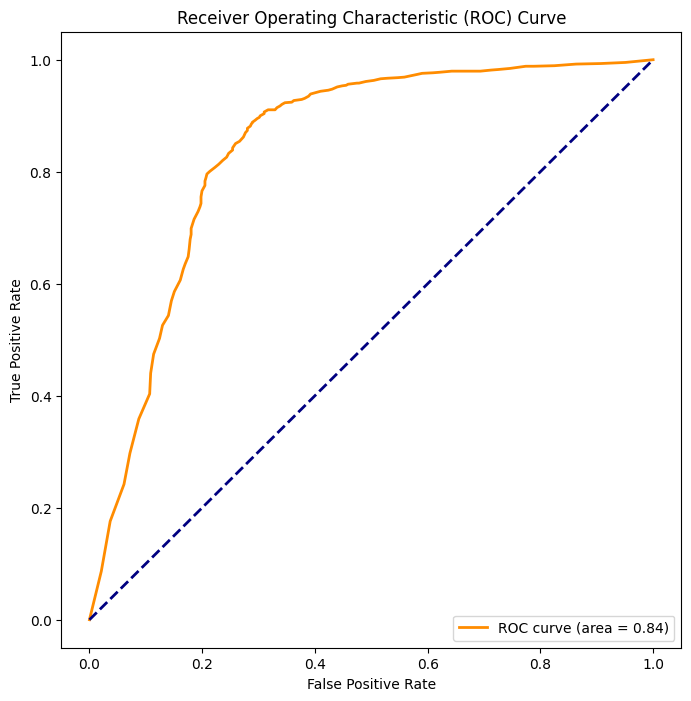

Optimal Threshold: 0.52


In [32]:
# Assuming 'success_indicator' is the target variable, and other columns are features
features = df[['item_no', 'category', 'main_promotion', 'color', 'stars']]
target = df['success_indicator']

# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features)

# Convert 'success_indicator' to binary labels
le = LabelEncoder()
target = le.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Get predicted probabilities for success (class 1)
y_probs = classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the optimal threshold based on Youden's J statistic
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold}')

In [33]:
# Assuming 'success_indicator' is the target variable, and other columns are features
features = df[['item_no', 'category', 'main_promotion', 'color', 'stars', 'success_indicator']]
target = df['success_indicator']

# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features)

# Convert 'success_indicator' to binary labels
le = LabelEncoder()
target = le.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Get predicted probabilities for success (class 1)
df['predicted_success'] = classifier.predict(features)

# Segregate 'top' and 'flop' entries
top_entries = df[df['predicted_success'] == 1]
flop_entries = df[df['predicted_success'] == 0]

# Calculate average star count for each section
average_stars_top = top_entries['stars'].mean()
average_stars_flop = flop_entries['stars'].mean()

print(f'Average Star Count for "Top" Entries: {average_stars_top:.2f}')
print(f'Average Star Count for "Flop" Entries: {average_stars_flop:.2f}')

Average Star Count for "Top" Entries: 3.85
Average Star Count for "Flop" Entries: 2.77


In [34]:
# Assuming 'success_indicator' is the target variable, and other columns are features
features = df[['item_no', 'category', 'main_promotion', 'color', 'stars', 'success_indicator']]
target = df['success_indicator']

# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features)

# Convert 'success_indicator' to binary labels
le = LabelEncoder()
target = le.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Get predicted success labels for each entry
df['predicted_success'] = classifier.predict(features)

# Create a DataFrame with success ratios for each combination
success_ratios = df.groupby(['category', 'main_promotion', 'color'])['predicted_success'].mean().reset_index()

# Separate 'top' and 'flop' entries
top_entries = success_ratios[success_ratios['predicted_success'] == 1]
flop_entries = success_ratios[success_ratios['predicted_success'] == 0]

# Display combinations with the highest success ratio for 'top'
print("Combinations with the highest success ratio for 'top':")
print(top_entries.sort_values(by='predicted_success', ascending=False).head(1))

# Display combinations with the highest success ratio for 'flop'
print("\nCombinations with the highest success ratio for 'flop':")
print(flop_entries.sort_values(by='predicted_success', ascending=False).head(1))

Combinations with the highest success ratio for 'top':
  category main_promotion  color  predicted_success
3   Blouse        Catalog  Green                1.0

Combinations with the highest success ratio for 'flop':
   category       main_promotion        color  predicted_success
23   Blouse  Display_Ad_Campaign  Multi-Color                0.0


In [37]:
# Assuming 'success_indicator' is the target variable, and other columns are features
features = df[['item_no', 'category', 'main_promotion', 'color', 'stars', 'success_indicator']]
target = df['success_indicator']

# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features)

# Convert 'success_indicator' to binary labels
le = LabelEncoder()
target = le.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Get predicted success labels for each entry
df['predicted_success'] = classifier.predict(features)

# Create a DataFrame with success ratios for each combination
success_ratios = df.groupby(['category', 'main_promotion', 'color'])['predicted_success'].mean().reset_index()

# Display the success ratios for each combination
print(success_ratios)

    category    main_promotion        color  predicted_success
0     Blouse           Catalog        Black           0.923077
1     Blouse           Catalog         Blue           0.500000
2     Blouse           Catalog        Brown           0.875000
3     Blouse           Catalog        Green           1.000000
4     Blouse           Catalog  Multi-Color           0.200000
..       ...               ...          ...                ...
225    Tunic  Frontpage_Header       Orange           0.000000
226    Tunic  Frontpage_Header         Pink           0.000000
227    Tunic  Frontpage_Header          Red           0.428571
228    Tunic  Frontpage_Header        White           0.739130
229    Tunic  Frontpage_Header       Yellow           0.300000

[230 rows x 4 columns]


In [42]:
features = df[['item_no', 'category', 'main_promotion', 'color', 'stars', 'success_indicator']]
target = df['success_indicator']

# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features)

# Convert 'success_indicator' to binary labels
le = LabelEncoder()
target = le.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Get predicted success labels for each entry
df['predicted_success'] = classifier.predict(features)

# Create a DataFrame with success ratios for each combination
success_ratios = df.groupby(['category', 'main_promotion', 'color'])['predicted_success'].mean().reset_index()

# Display the success ratios for each combination
for index, row in success_ratios.iterrows():
    print(f"{row['category']} - {row['main_promotion']} - {row['color']} - Success Ratio: {row['predicted_success']:.2f}")

Blouse - Catalog - Black - Success Ratio: 0.92
Blouse - Catalog - Blue - Success Ratio: 0.50
Blouse - Catalog - Brown - Success Ratio: 0.88
Blouse - Catalog - Green - Success Ratio: 1.00
Blouse - Catalog - Multi-Color - Success Ratio: 0.20
Blouse - Catalog - Orange - Success Ratio: 0.89
Blouse - Catalog - Pink - Success Ratio: 0.88
Blouse - Catalog - Red - Success Ratio: 0.47
Blouse - Catalog - White - Success Ratio: 0.33
Blouse - Catalog - Yellow - Success Ratio: 0.89
Blouse - Category_Highlight - Black - Success Ratio: 0.72
Blouse - Category_Highlight - Blue - Success Ratio: 0.23
Blouse - Category_Highlight - Green - Success Ratio: 0.90
Blouse - Category_Highlight - Multi-Color - Success Ratio: 0.56
Blouse - Category_Highlight - Orange - Success Ratio: 0.40
Blouse - Category_Highlight - Pink - Success Ratio: 0.40
Blouse - Category_Highlight - Red - Success Ratio: 0.42
Blouse - Category_Highlight - White - Success Ratio: 0.27
Blouse - Category_Highlight - Yellow - Success Ratio: 0.84


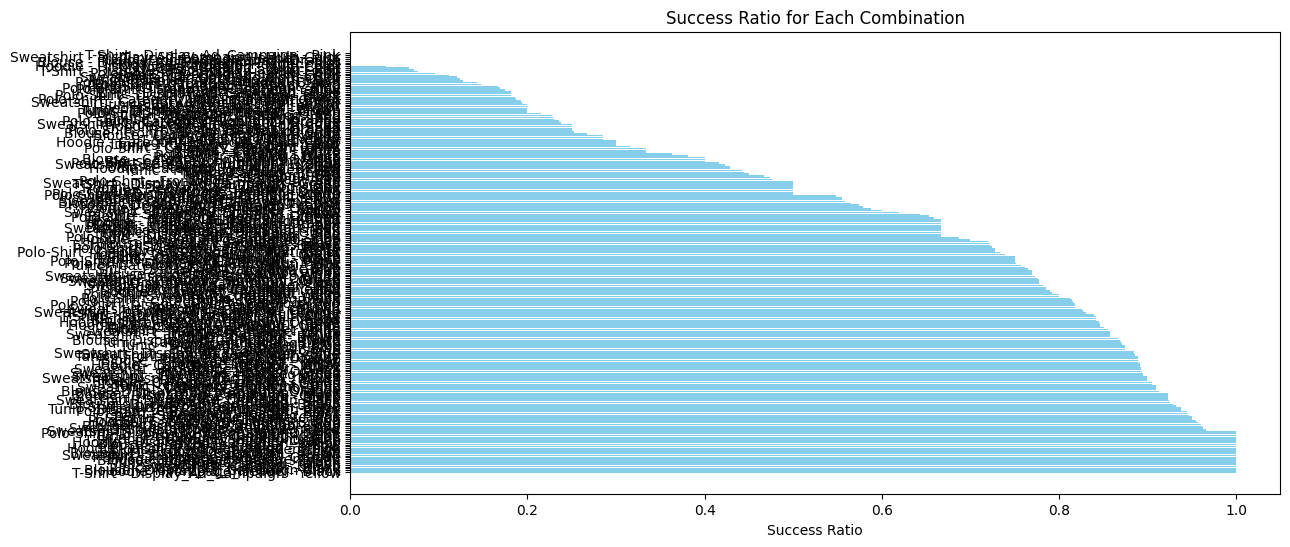

In [43]:
# Sort the DataFrame by success ratio in descending order
success_ratios = success_ratios.sort_values(by='predicted_success', ascending=False)

# Plot the success ratios on a bar chart
plt.figure(figsize=(12, 6))
plt.barh(range(len(success_ratios)), success_ratios['predicted_success'], color='skyblue')
plt.yticks(range(len(success_ratios)), [f"{row['category']} - {row['main_promotion']} - {row['color']}" for _, row in success_ratios.iterrows()])
plt.xlabel('Success Ratio')
plt.title('Success Ratio for Each Combination')
plt.show()

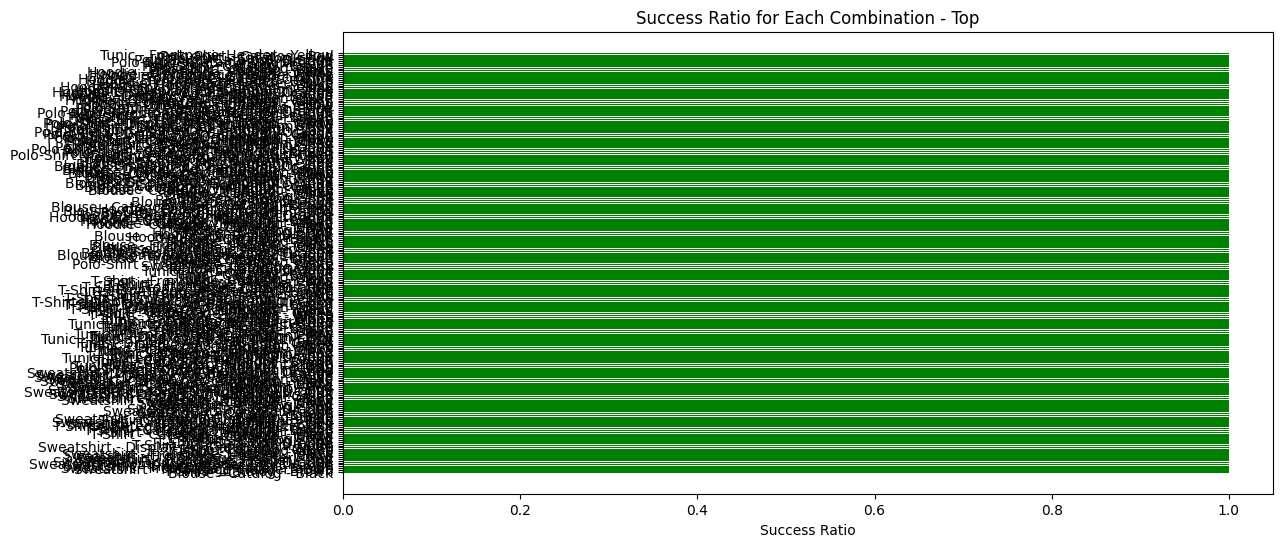

In [45]:
# Create a DataFrame with success ratios for each combination
success_ratios_top = df[df['predicted_success'] == 1].groupby(['category', 'main_promotion', 'color'])['predicted_success'].mean().reset_index()

# Sort the DataFrame by success ratio in descending order
success_ratios_top = success_ratios_top.sort_values(by='predicted_success', ascending=False)

# Plot the success ratios on a bar chart for 'Top'
plt.figure(figsize=(12, 6))
plt.barh(range(len(success_ratios_top)), success_ratios_top['predicted_success'], color='green')
plt.yticks(range(len(success_ratios_top)), [f"{row['category']} - {row['main_promotion']} - {row['color']}" for _, row in success_ratios_top.iterrows()])
plt.xlabel('Success Ratio')
plt.title('Success Ratio for Each Combination - Top')
plt.show()

In [66]:
#not needed for flop as it will be zero